# Exercise on supervised learning

In this exercise, you will train machine learning methods to predict if a person will survive the Titantic disaster.

The goal is to learn:
*	how to apply different ML classification methods.
*	how to perform cross-validation.
*	how to assess and visualize the performance.
*	how to get an idea on which features are most important.

You will be using the same titantic dataset as you worked with on Monday, but instead of visualizing it and calculating properties you will be training ML methods to predict the chance of survival. You will train different ML methods using different parameters and different features using cross-validation to evaluate performance. For each ML method, you should save your final model, so you can load it and use it for predicting on new data later. Once you have trained and optimized a few ML methods, you will be given a new independent test set to finally check your performance on completely unseen data. We will compare which ML methods performed best, what was the cross-validated performance and what was the test set performance. Hopefully we will choose slightly different methods and training parameters, so we can compare what seems to work best.

We start by reading in the data....


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Read in the data to a pandas DataFrame using the read_csv method.
train=pd.read_csv('titanic_data.csv')

# We are using the train data as placeholder for the test data,
# so we can implement code to run predictions on the test pandas DataFrame
test=pd.read_csv('titanic_data.csv')

#Uncomment this line to read in the true test, it will be revealed in due time....
#test=pd.read_csv('titanic_test.csv')
train


/Users/salendrapradh/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",1
2,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000000,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",1
3,1,1,"Beckwith, Mr. Richard Leonard",male,37.000000,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",1
4,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.000000,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",1
5,1,1,"Bissette, Miss. Amelia",female,35.000000,0,0,PC 17760,135.6333,C99,S,8,NaN,NaN,1
6,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S,8,NaN,"Birkdale, England Cleveland, Ohio",1
7,1,0,"Brady, Mr. John Bertram",male,41.000000,0,0,113054,30.5000,A21,S,NaN,NaN,"Pomeroy, WA",1
8,1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.000000,2,0,11769,51.4792,C101,S,D,NaN,"Belmont, MA",1
9,1,0,"Butt, Major. Archibald Willingham",male,45.000000,0,0,113050,26.5500,B38,S,NaN,NaN,"Washington, DC",1


In [2]:
test.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",1
2,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",1
3,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",1
4,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",1


In [3]:
test.shape

(1040, 15)

## Data Dictionary

|Variable |	Definition |	Key         |
|----------------------------------------
|survival | Survival   |0 = No, 1 = Yes |
|pclass	| Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
|sex	| Sex	|
|age	| Age in years	|
|sibsp	| # of siblings / spouses aboard the Titanic	|
|parch	| # of parents / children aboard the Titanic	|
|ticket	| Ticket number	|
|fare	| Passenger fare	|
|cabin	| Cabin number	|
|embarked |	Port of Embarkation	| C = Cherbourg, Q = Queenstown, S = Southampton|
|boat | number on rescue boat | 
|body | recovered body number |
|home.dest | home destination |
|has_cabin_number | has a cabin | 0 = No, 1 = Yes|


### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

#### sibsp: The dataset defines family relations in this way

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

#### parch: The dataset defines family relations in this way

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

Let's add the same columns as we added on Monday, based on data in other columns (It is perfectly fine to copy the code from Monday)

Add some binary information columns:
* Add a 'child' column where those with age < 10 get a 1 and the others 0
* Add a 'female' column for female
* Add a 'male' column for male
* Add a 'adult' column for those with age > 16
* Add a 'adult_male' column for those with age > 16 and male
* Add an 'adult_female' column for those with age > 16 and female

If you want you can also play around with adding other features based on the columns.

While you are at it do the same for the "test" dataframe as well so it has exactly the same columns. It will be easier later when you want to test on that data.  

In [4]:
#EXAMPLE
#This loop over both the train and test dataframes 
for f in [train,test]:
    #This will add a new column with the name 'child' containing all 0
    f['child']=0
#This will change the values of rows that statisfy the train['age']<10 condition
    f['child'].loc[f['age']<10]=1
    f['adult_male']=0
#This will change the values of rows that statisfy the train['age']> 16 and train['sex']=='male' condition, 
#the paranteses around the expression are important.
    f['adult_male'].loc[(f['age']>16) & (f['sex']=='male')]=1
########
#Now try adding the other examples 
    f['adult']=0
    f['adult'].loc[train['age']>16]=1
    
    f['adult_female']=0
    f['adult_female'].loc[(train['age']>16) & (train['sex']=='female')]=1

    f['female']=0
    f['male']=0
    
    f['female'].loc[(train['sex']=='female')]=1
    f['male'].loc[(train['sex']=='male')]=1

### And maybe some more features
    f['embarked_S']=0
    f['embarked_S'].loc[f['embarked']=="S"]=1
    
    f['embarked_C']=0
    f['embarked_C'].loc[f['embarked']=="C"]=1
    
    f['embarked_Q']=0
    f['embarked_Q'].loc[f['embarked']=="C"]=1
    
    f['sexy']=0
    f['sexy'].loc[f['sex']=="female"]=1
    
    
train  
print (test[['embarked','embarked_S','embarked_C','embarked_Q']])

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     embarked  embarked_S  embarked_C  embarked_Q
0           S           1           0           0
1           S           1           0           0
2           S           1           0           0
3           S           1           0           0
4           S           1           0           0
5           S           1           0           0
6           S           1           0           0
7           S           1           0           0
8           S           1           0           0
9           S           1           0           0
10          S           1           0           0
11          S           1           0           0
12          S           1           0           0
13          C           0           1           1
14          C           0           1           1
15          S           1           0           0
16          S           1           0           0
17          C           0           1           1
18          C           0           1           1


## Cross-validation sets
Cross-validation is a way to estimate performance by training and testing on subsets of the data. Usually it is common to divide the data into 5 parts (with no similarity between them). If there is no similarity between the data points, the division can be random. But usually there is some connection between data points. In the case of training on sequence data, sequence similarity is commonly used to group data points. Here, we will be using the number on the `ticket` to split up the set to avoid training on data from one family member and then test on data from the same family. If you want you can try otherways of dividing the set, or even do it randomly.

To split on the ticket number, we will be creating a dictionary with the ticket number as key and cross-validation set number [1,2,3,4 or 5] as value, and adding a new `cv` column to the `train` pandas DataFrame.

The following code block will iterate over all rows and store the cv set number in the dictionary `ticket_number_cv`. 
Modify the code to so it also adds a `train['cv']` column with the cv set number of the corresponding row. 

In [5]:
#make cross_val sets by grouping ticket number
ticket_number_cv={}
cv=1
train['cv']=None
cv_count={}
for i,row in train.iterrows():
    if cv not in cv_count:
        cv_count[cv]=0
    if row['ticket'] not in ticket_number_cv:
            ticket_number_cv[row['ticket']]=cv
            cv=cv+1
            if cv>5:
                cv=1
    train.loc[i,'cv']=ticket_number_cv[row['ticket']]
    cv_count[ticket_number_cv[row['ticket']]]=cv_count[ticket_number_cv[row['ticket']]]+1
    

print(train.shape)
print(cv_count)

(1040, 26)
{1: 201, 2: 204, 3: 205, 4: 211, 5: 219}


In [6]:
train['cv'][1:5]

1    2
2    3
3    4
4    4
Name: cv, dtype: int64

In [7]:
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,adult_male,adult,adult_female,female,male,embarked_S,embarked_C,embarked_Q,sexy,cv
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,...,0,1,1,1,0,1,0,0,1,1
1,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,...,0,1,1,1,0,1,0,0,1,2
2,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,...,1,1,0,0,1,1,0,0,0,3
3,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,...,1,1,0,0,1,1,0,0,0,4
4,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,...,0,1,1,1,0,1,0,0,1,4


## Scaling
For some machine learning methods, e.g. SVM, scaling the features between 0-1 can improve the convergence and performance. Use the same `preprocessing.MinMaxScalar()` from `sklearn` as we used on Monday. If you want you can choose to compare the performance of scaling vs. no scaling. 

In [16]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()


#Pick the columns that have numbers that can be used for training:
trainable_cols=["age","fare","pclass","has_cabin_number","male","female","sibsp","parch","child","adult","adult_female","adult_male"]
#trainable_cols=["age","fare","pclass","sexy", "parch"]

#For the training we include the 'cv' column
train_columns=trainable_cols + ["survived","cv"]
test_columns=trainable_cols + ["survived"]

#Make train_data and test_data to be used for training and testing.
train_data=train[train_columns].dropna()
test_data=test[test_columns].dropna()
#df=train_target[trainable_cols]
  
scaling=True
if scaling:
    columns_to_scale=trainable_cols 
    # Fit the scaler on the training data
    min_max_scaler.fit(train_data[columns_to_scale].values)
    # Transform the scaling to the train_data
    train_data.loc[:,columns_to_scale]=min_max_scaler.transform(train_data[columns_to_scale].values)
    # Transform the scaling to the test_data
    test_data.loc[:,columns_to_scale]=min_max_scaler.transform(test_data[columns_to_scale].values)

train_data.head()

,age,fare,pclass,has_cabin_number,male,female,sibsp,parch,child,adult,adult_female,adult_male,survived,cv
0,0.359162,0.412503,0.0,1.0,0.0,1.0,0.000,0.000000,0.0,1.0,1.0,0.0,1,1
1,0.660733,0.100481,0.0,1.0,0.0,1.0,0.250,0.000000,0.0,1.0,1.0,0.0,1,2
2,1.000000,0.058556,0.0,1.0,1.0,0.0,0.000,0.000000,0.0,1.0,0.0,1.0,1,3
3,0.459686,0.102579,0.0,1.0,1.0,0.0,0.125,0.111111,0.0,1.0,0.0,1.0,1,4
4,0.585340,0.102579,0.0,1.0,0.0,1.0,0.125,0.111111,0.0,1.0,1.0,0.0,1,4


In [17]:
print(test_data.shape)
print(train_data.shape)

(1039, 13)
(1039, 14)


## Setting up the data for training.
Set up the data by making a numpy matrix of the training data called `X`, numpy vector with the target values `Y`, and if you are using cross-validitation use the PreDefinedSplit class (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.PredefinedSplit.html) to


In [26]:
from sklearn.model_selection import PredefinedSplit
(size_x,size_y)=train_data.shape
target_index=size_y-2
cv_index=size_y-1


#Put the training data in X the .values method returns a numpy matrix of the numbers in the DataFrame.
X=train_data[trainable_cols].values #,0:target_index]
#print (X)

#Put the target value in Y
Y=train_data['survived'].values

#Use the PredefinedSplit class to define the cross-validation sets from before.
cv = PredefinedSplit(train_data['cv'].values)



In [27]:
test_data.head()

,age,fare,pclass,has_cabin_number,male,female,sibsp,parch,child,adult,adult_female,adult_male,survived
0,0.359162,0.412503,0.0,1.0,0.0,1.0,0.000,0.000000,0.0,1.0,1.0,0.0,1
1,0.660733,0.100481,0.0,1.0,0.0,1.0,0.250,0.000000,0.0,1.0,1.0,0.0,1
2,1.000000,0.058556,0.0,1.0,1.0,0.0,0.000,0.000000,0.0,1.0,0.0,1.0,1
3,0.459686,0.102579,0.0,1.0,1.0,0.0,0.125,0.111111,0.0,1.0,0.0,1.0,1
4,0.585340,0.102579,0.0,1.0,0.0,1.0,0.125,0.111111,0.0,1.0,1.0,0.0,1


In [29]:
train_data.head()

,age,fare,pclass,has_cabin_number,male,female,sibsp,parch,child,adult,adult_female,adult_male,survived,cv
0,0.359162,0.412503,0.0,1.0,0.0,1.0,0.000,0.000000,0.0,1.0,1.0,0.0,1,1
1,0.660733,0.100481,0.0,1.0,0.0,1.0,0.250,0.000000,0.0,1.0,1.0,0.0,1,2
2,1.000000,0.058556,0.0,1.0,1.0,0.0,0.000,0.000000,0.0,1.0,0.0,1.0,1,3
3,0.459686,0.102579,0.0,1.0,1.0,0.0,0.125,0.111111,0.0,1.0,0.0,1.0,1,4
4,0.585340,0.102579,0.0,1.0,0.0,1.0,0.125,0.111111,0.0,1.0,1.0,0.0,1,4


## Training Machine Learning Methods
Finally we can train machine learning methods... 

In [31]:
import sklearn
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn import svm
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=None)

#Some dictionaries to store cross-validated predictions

pred_save=[]
true_save=[]
pred_prob_save=[]


for i, (train_index, val_index) in enumerate(cv.split(),1):
    print("Set: ",i)
    print("Training on",len(train_index),"examples")
    print("Testing on",len(val_index),"examples")
    (X_train, X_val) = X[train_index,:], X[val_index,:]
    (Y_train, Y_val) = Y[train_index], Y[val_index]
    #print X_train.shape
    #print Y_train.shape
    #train_pred=clf.predict(X_train)
    #acc_train=sklearn.metrics.accuracy_score(train_pred,Y_train)
    #print acc_train
    clf=clf.fit(X_train,Y_train)
         #   continue
    
    #Predict on the training data    
    pred=clf.predict(X_train)
    #Calculate performance measures on the validation data   
    acc_train=accuracy_score(pred,Y_train)
    mcc_train=matthews_corrcoef(pred,Y_train)
    f1_train=f1_score(pred,Y_train)
    
    #Predict on the validation data
    val_pred=clf.predict(X_val)
    #print (val_pred)
    #Predict the probability (to use the roc-plot later)
    val_pred_prob=val_pred
    
    #val_pred_prob=clf.predict_proba(X_val)
    
    #Save the values to have predictions for all folds.
    pred_save.append(val_pred)
    pred_prob_save.append(val_pred_prob)
    true_save.append(Y_val)
    #Calculate performance measures on the validation data
    acc=accuracy_score(val_pred,Y_val)
    mcc=matthews_corrcoef(val_pred,Y_val)
    f1=f1_score(val_pred,Y_val)
    
    print("Training performance","f1",f1_train,"acc",acc_train,"mcc",mcc_train)
    print("Validation performance","f1",f1,"acc",acc,"mcc",mcc)
    print("==============")

  
#Calculate overall validation performance
predictions=np.concatenate(pred_save)
correct=np.concatenate(true_save)
predicted_prob=np.concatenate(pred_prob_save)
acc=accuracy_score(predictions,correct)
mcc=matthews_corrcoef(predictions,correct)
f1=f1_score(predictions,correct)
print("==============")
print("Overall Validation Performance","f1",f1,"acc",acc,"mcc",mcc)
print("==============")


pred = clf.predict(X_test)
acc_train=accuracy_score(pred,Y_test)
mcc_train=matthews_corrcoef(pred,Y_test)
f1_train=f1_score(pred,Y_test)
    
print("==============")
print("Overall Validation Performance on test","f1",f1,"acc",acc,"mcc",mcc)
print("==============")


Set:  1
Training on 838 examples
Testing on 201 examples
Training performance f1 0.9686520376175548 acc 0.9761336515513126 mcc 0.9495837117685326
Validation performance f1 0.6900584795321637 acc 0.736318407960199 mcc 0.4606587592925781
Set:  2
Training on 835 examples
Testing on 204 examples
Training performance f1 0.9706336939721792 acc 0.9772455089820359 mcc 0.9521384444331745
Validation performance f1 0.6625000000000001 acc 0.7352941176470589 mcc 0.4453584012693717
Set:  3
Training on 834 examples
Testing on 205 examples
Training performance f1 0.9708141321044547 acc 0.9772182254196643 mcc 0.9522090869628486
Validation performance f1 0.6794871794871794 acc 0.7560975609756098 mcc 0.4832593782669784
Set:  4
Training on 829 examples
Testing on 210 examples
Training performance f1 0.9718518518518519 acc 0.97708082026538 mcc 0.9527699662630589
Validation performance f1 0.6617647058823529 acc 0.780952380952381 mcc 0.5004732608726313
Set:  5
Training on 820 examples
Testing on 219 examples

In [ ]:
#Some code to visualize decision trees. Assume there is train decision tree namned 'clf'

#!conda install -y python-graphviz
#import graphviz
#from sklearn import tree
#dot_data = tree.export_graphviz(clf, out_file=None,feature_names=trainable_cols,filled=True,class_names=['Survived','Died']) 
#graph = graphviz.Source(dot_data) 
#graph.render("titanic") 

In [32]:
trainable_cols

['age',
 'fare',
 'pclass',
 'has_cabin_number',
 'male',
 'female',
 'sibsp',
 'parch',
 'child',
 'adult',
 'adult_female',
 'adult_male']

In [35]:
#trainable_cols=["pclass","male"]

for feat_stop in range(0,X.shape[1]+1):
    print(feat_stop)
    name="-".join(trainable_cols[0:feat_stop+1])
    print (name)

0
age
1
age-fare
2
age-fare-pclass
3
age-fare-pclass-has_cabin_number
4
age-fare-pclass-has_cabin_number-male
5
age-fare-pclass-has_cabin_number-male-female
6
age-fare-pclass-has_cabin_number-male-female-sibsp
7
age-fare-pclass-has_cabin_number-male-female-sibsp-parch
8
age-fare-pclass-has_cabin_number-male-female-sibsp-parch-child
9
age-fare-pclass-has_cabin_number-male-female-sibsp-parch-child-adult
10
age-fare-pclass-has_cabin_number-male-female-sibsp-parch-child-adult-adult_female
11
age-fare-pclass-has_cabin_number-male-female-sibsp-parch-child-adult-adult_female-adult_male
12
age-fare-pclass-has_cabin_number-male-female-sibsp-parch-child-adult-adult_female-adult_male


Then we might want to loop over different features and check performance....

In [36]:
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn import svm

#Define a classifier
clf = RandomForestClassifier(n_estimators=100, 
                             max_depth=None, 
                             min_samples_split=2, 
                             n_jobs=4,
                             random_state=None,verbose=0)

 
#Use the cv.split() method to generate an iterator of the cross-validation sets.


#Some dictionaries to store cross-validated predictions
predictions={}
correct={}
predicted_prob={}

pred_save=[]
true_save=[]
pred_prob_save=[]
legend_text=[]

#trainable_cols=["age","fare","pclass","has_cabin_number","male","female","sibsp","parch","child","adult","adult_female","adult_male"]
#trainable_cols=["pclass","male"]

for feat_stop in range(0,X.shape[1]+1):
    name="-".join(trainable_cols[0:feat_stop+1])
    #name
    legend_text.append(name) #trainable_cols[feat_stop-1]) #len(feat_name))
    pred_save=[]
    true_save=[]
    pred_prob_save=[]
    for i, (train_index, val_index) in enumerate(cv.split(),1):
        #print "Set: ",i, name
        #print "Training on",len(train_index),"examples" 
        #print "Testing on",len(val_index),"examples"
        (X_train, X_val) = X[train_index,0:feat_stop+1], X[val_index,0:feat_stop+1]
        (Y_train, Y_val) = Y[train_index], Y[val_index]
    #print X_train.shape
    #print Y_train.shape
    #train_pred=clf.predict(X_train)
    #acc_train=sklearn.metrics.accuracy_score(train_pred,Y_train)
    #print acc_train
        clf=clf.fit(X_train,Y_train)
         #   continue

    #Predict on the training data    
        pred=clf.predict(X_train)
    #Calculate performance measures on the validation data   
        acc_train=accuracy_score(pred,Y_train)
        mcc_train=matthews_corrcoef(pred,Y_train)
        f1_train=f1_score(pred,Y_train)
    
    #Predict on the validation data
        val_pred=clf.predict(X_val)
    #Predict the probability (to use the roc-plot later)
        val_pred_prob=clf.predict_proba(X_val)
    #Save the values to have predictions for all folds.
        pred_save.append(val_pred)
        pred_prob_save.append(val_pred_prob)
        true_save.append(Y_val)
    #Calculate performance measures on the validation data
        acc=accuracy_score(val_pred,Y_val)
        mcc=matthews_corrcoef(val_pred,Y_val)
        f1=f1_score(val_pred,Y_val)
    
        #print "Training performance","f1",f1_train,"acc",acc_train,"mcc",mcc_train
        #print "Validation performance","f1",f1,"acc",acc,"mcc",mcc

       
    
    
#Calculate overall validation performance
    predictions[name]=np.concatenate(pred_save)
    correct[name]=np.concatenate(true_save)
    predicted_prob[name]=np.concatenate(pred_prob_save)
    acc=accuracy_score(predictions[name],correct[name])
    mcc=matthews_corrcoef(predictions[name],correct[name])
    f1=f1_score(predictions[name],correct[name])
    print ("==============")
    print ("Training on", name)
    print ("Overall Validation Performance","f1",f1,"acc",acc,"mcc",mcc)
    print ("==============")
    
pred = clf.predict(X_test)
acc_train=accuracy_score(pred,Y_test)
mcc_train=matthews_corrcoef(pred,Y_test)
f1_train=f1_score(pred,Y_test)
    
print("==============")
print("Overall Validation Performance on test","f1",f1,"acc",acc,"mcc",mcc)
print("==============")


Training on age
Overall Validation Performance f1 0.3950617283950617 acc 0.6227141482194418 mcc 0.1578471557673585
Training on age-fare
Overall Validation Performance f1 0.5216316440049444 acc 0.6275264677574591 mcc 0.21672624469850577
Training on age-fare-pclass
Overall Validation Performance f1 0.5583756345177665 acc 0.6650625601539942 mcc 0.28963054318612397
Training on age-fare-pclass-has_cabin_number
Overall Validation Performance f1 0.5445420326223337 acc 0.6506256015399422 mcc 0.26162638240736663
Training on age-fare-pclass-has_cabin_number-male
Overall Validation Performance f1 0.7126725219573401 acc 0.7795957651588066 mcc 0.5344701953618395
Training on age-fare-pclass-has_cabin_number-male-female
Overall Validation Performance f1 0.7124999999999999 acc 0.7786333012512031 mcc 0.5329300456684142
Training on age-fare-pclass-has_cabin_number-male-female-sibsp
Overall Validation Performance f1 0.7117346938775511 acc 0.782483156881617 mcc 0.5387053524846067
Training on age-fare-pcla

In [38]:
legend_text=[]
pred_sorted=sorted(predictions.items(), key=lambda kv: (len(kv[1]), kv[0]))
print (pred_sorted)

[('age', array([0, 1, 0, ..., 0, 0, 0])), ('age-fare', array([0, 0, 0, ..., 1, 0, 0])), ('age-fare-pclass', array([0, 0, 0, ..., 1, 0, 1])), ('age-fare-pclass-has_cabin_number', array([0, 0, 1, ..., 1, 0, 1])), ('age-fare-pclass-has_cabin_number-male', array([1, 1, 0, ..., 1, 0, 0])), ('age-fare-pclass-has_cabin_number-male-female', array([1, 1, 0, ..., 0, 0, 0])), ('age-fare-pclass-has_cabin_number-male-female-sibsp', array([1, 1, 0, ..., 1, 0, 0])), ('age-fare-pclass-has_cabin_number-male-female-sibsp-parch', array([1, 1, 1, ..., 0, 0, 0])), ('age-fare-pclass-has_cabin_number-male-female-sibsp-parch-child', array([1, 1, 0, ..., 0, 0, 0])), ('age-fare-pclass-has_cabin_number-male-female-sibsp-parch-child-adult', array([1, 1, 0, ..., 0, 0, 0])), ('age-fare-pclass-has_cabin_number-male-female-sibsp-parch-child-adult-adult_female', array([1, 1, 0, ..., 0, 0, 0])), ('age-fare-pclass-has_cabin_number-male-female-sibsp-parch-child-adult-adult_female-adult_male', array([1, 1, 0, ..., 1, 0, 0

[('age', array([0, 1, 0, ..., 0, 0, 0])), ('age-fare', array([0, 0, 0, ..., 1, 0, 0])), ('age-fare-pclass', array([0, 0, 0, ..., 1, 0, 1])), ('age-fare-pclass-has_cabin_number', array([0, 0, 1, ..., 1, 0, 1])), ('age-fare-pclass-has_cabin_number-male', array([1, 1, 0, ..., 1, 0, 0])), ('age-fare-pclass-has_cabin_number-male-female', array([1, 1, 0, ..., 0, 0, 0])), ('age-fare-pclass-has_cabin_number-male-female-sibsp', array([1, 1, 0, ..., 1, 0, 0])), ('age-fare-pclass-has_cabin_number-male-female-sibsp-parch', array([1, 1, 1, ..., 0, 0, 0])), ('age-fare-pclass-has_cabin_number-male-female-sibsp-parch-child', array([1, 1, 0, ..., 0, 0, 0])), ('age-fare-pclass-has_cabin_number-male-female-sibsp-parch-child-adult', array([1, 1, 0, ..., 0, 0, 0])), ('age-fare-pclass-has_cabin_number-male-female-sibsp-parch-child-adult-adult_female', array([1, 1, 0, ..., 0, 0, 0])), ('age-fare-pclass-has_cabin_number-male-female-sibsp-parch-child-adult-adult_female-adult_male', array([1, 1, 0, ..., 1, 0, 0

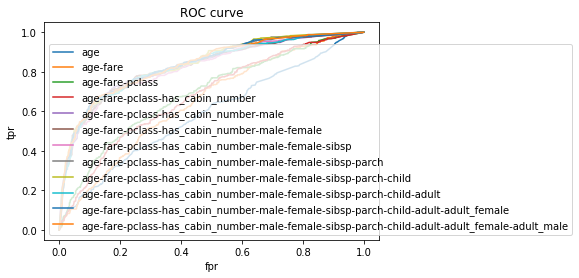

In [39]:
plt.clf()

legend_text=[]
pred_sorted=sorted(predictions.items(), key=lambda kv: (len(kv[1]), kv[0]))
print (pred_sorted)


for (name,value) in pred_sorted:
    #print key, value
    #continue
    legend_text.append(name)
    acc=accuracy_score(predictions[name],correct[name])
    mcc=matthews_corrcoef(predictions[name],correct[name])
    f1=f1_score(predictions[name],correct[name])
    #(prec,recall,thres)=precision_recall_curve(true_save,pred_prob_save[:,1])
    (fpr,tpr,thres_roc)=roc_curve(correct[name],predicted_prob[name][:,1])
    plt.plot(fpr,tpr)
    plt.title('ROC curve')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
      
    plt.savefig('RF.png',dpi=300)
plt.legend(legend_text)  
plt.show()


In [40]:
print(clf.feature_importances_)


[0.23407061 0.28180864 0.06465887 0.04048509 0.07531759 0.09787785
 0.05252515 0.03782746 0.0155255  0.00581784 0.03639988 0.05768553]


In [43]:
#from sklearn.metrics import matthews_corrcoef
#trainable_cols=["age","fare","pclass","has_cabin_number","male","female","sibsp","parch","passenger_on_ticket","kids_on_ticket","teens_on_ticket","adults_on_ticket","child"]
trainable_cols=["age","fare","pclass","has_cabin_number","male","female","sibsp","parch","child","adult","adult_female","adult_male"]
#trainable_cols.reverse()
trainable_cols.append("survived")
trainable_cols.append("cv")
#train[trainable_cols].dropna().to_csv('titanic_data.csv')
#print trainable_cols
#trainable_cols=["age","fare","pclass","survived","cv"]
#tmp=train[["cv","survived"]]
#corr=np.corrcoef(tmp)
#df_clean=train[trainable_cols].dropna()
#df_clean["survived"].unique
#df_clean.to_excel('tmp.xls')
#g = sns.factorplot("cv", "survived", "male", data=df_clean, kind="bar", palette="muted", legend=True)
#plt.show()

print(trainable_cols)


data=train[trainable_cols].dropna().values.astype(float)
print(data.shape[1])
(size_x,size_y)=data.shape
X=data[:,0:size_y-2]
Y=data[:,size_y-2]
CV_splits=data[:,size_y-1]
print(X)
#print data.shape
corr=np.corrcoef(data)
#corr=np.corrcoef(data, rowvar=False)
#print corr.shape

#print sklearn.metrics
#np.set_printoptions(precision=3)
#print(corr)
for i,name in enumerate(trainable_cols):
#    c=matthews_corrcoef(data[:,i],data[:,size_y-1])
    print(i,name,corr[i,size_y-1])
    

['age', 'fare', 'pclass', 'has_cabin_number', 'male', 'female', 'sibsp', 'parch', 'child', 'adult', 'adult_female', 'adult_male', 'survived', 'cv']
14
[[ 29.         211.3375       1.         ...   1.           1.
    0.        ]
 [ 53.          51.4792       1.         ...   1.           1.
    0.        ]
 [ 80.          30.           1.         ...   1.           0.
    1.        ]
 ...
 [ 27.           8.6625       3.         ...   1.           0.
    1.        ]
 [ 29.88113451   7.225        3.         ...   1.           0.
    1.        ]
 [ 29.88113451  14.4583       3.         ...   1.           0.
    1.        ]]
0 age 0.9981474353071348
1 fare 0.7980496052814242
2 pclass 0.4607260854445956
3 has_cabin_number 0.9032776035680471
4 male 0.8414556673211337
5 female 0.9977252513172143
6 sibsp 0.5257191313653208
7 parch 0.7035214014176122
8 child 0.7615309393643593
9 adult 0.6157468051442633
10 adult_female 0.24534579637219622
11 adult_male 0.8874979721499958
12 survived 0.8821743

# YOU HAVE FORGOTTEN TO INITIALIZE "MEASURES" VARIABLE

100 1 838 201
age-fare-pclass-has_cabin_number-male-female-sibsp-parch-child-adult-adult_female-adult_male-survived 12
0.9495766353954387
100 2 835 204
age-fare-pclass-has_cabin_number-male-female-sibsp-parch-child-adult-adult_female-adult_male-survived 12
0.9521428493272371
100 3 834 205
age-fare-pclass-has_cabin_number-male-female-sibsp-parch-child-adult-adult_female-adult_male-survived 12
0.9524642975775579
100 4 829 210
age-fare-pclass-has_cabin_number-male-female-sibsp-parch-child-adult-adult_female-adult_male-survived 12
0.9526973963861343
100 5 820 219
age-fare-pclass-has_cabin_number-male-female-sibsp-parch-child-adult-adult_female-adult_male-survived 12
0.9456566785562306


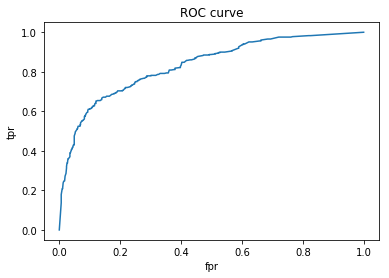

In [63]:
measures = {'MC_train':{},
           'MC_test':{},
           'acc_train':{},
            'acc_test':{},
            'F1_train':{},
           'F1_test':{} 
           }
plt.clf()
legend_text=[]
for feat_stop in range(X.shape[1],X.shape[1]+1):
    feat_name="-".join(trainable_cols[0:feat_stop+1])
    legend_text.append(trainable_cols[feat_stop-1]) #len(feat_name))
    for trees in (100,): #(1,10,100,1000):
        clf = RandomForestClassifier(n_estimators=trees, max_depth=None, min_samples_split=2, n_jobs=4,random_state=None,verbose=0)
        fold=1
        pred_save=[]
        true_save=[]
        pred_prob_save=[]
        for train_index, test_index in cv.split():
            print(trees,fold,len(train_index),len(test_index))
            #continue
            print(feat_name,feat_stop)

            X_train, X_test = X[train_index,0:feat_stop+1], X[test_index,0:feat_stop+1]
            Y_train, Y_test = Y[train_index], Y[test_index]
           # continue
            #print feat_name,feat_stop,X_test.shape
           # continue
            clf=clf.fit(X_train,Y_train)
         #   continue
            train_pred=clf.predict(X_train)
            test_pred=clf.predict(X_test)
            test_pred_prob=clf.predict_proba(X_test)
            acc_train=sklearn.metrics.accuracy_score(train_pred,Y_train)
            MC_train=sklearn.metrics.matthews_corrcoef(train_pred,Y_train)
            acc=sklearn.metrics.accuracy_score(train_pred,Y_train)
            MC=sklearn.metrics.matthews_corrcoef(train_pred,Y_train)
            print(MC_train)
            
            name=feat_name +'-trees-'+str(trees)+'-fold-'+str(fold)
            
            measures['MC_train'][name]=sklearn.metrics.matthews_corrcoef(train_pred,Y_train)
            measures['MC_test'][name]=sklearn.metrics.matthews_corrcoef(test_pred,Y_test)
            measures['acc_train'][name]=sklearn.metrics.accuracy_score(train_pred,Y_train)
            measures['acc_test'][name]=sklearn.metrics.accuracy_score(test_pred,Y_test)
            measures['F1_train'][name]=sklearn.metrics.f1_score(train_pred,Y_train)
            measures['F1_test'][name]=sklearn.metrics.f1_score(test_pred,Y_test)
            pred_save.append(test_pred)
            pred_prob_save.append(test_pred_prob)
            true_save.append(Y_test)
            fold=fold+1
        #continue
        name=feat_name +'-trees-'+str(trees)+'-overall'
    #print Y_test
    #print np.concatenate(true_save)
        pred_save=np.concatenate(pred_save)
        true_save=np.concatenate(true_save)
        pred_prob_save=np.concatenate(pred_prob_save)
        measures['MC_test'][name]=sklearn.metrics.matthews_corrcoef(pred_save,true_save)
        measures['acc_test'][name]=sklearn.metrics.accuracy_score(pred_save,true_save)
        measures['F1_test'][name]=sklearn.metrics.f1_score(pred_save,true_save)
        (prec,recall,thres)=sklearn.metrics.precision_recall_curve(true_save,pred_prob_save[:,1])
        (fpr,tpr,thres_roc)=sklearn.metrics.roc_curve(true_save,pred_prob_save[:,1])
        plt.plot(fpr,tpr)
        plt.title('ROC curve')
        plt.xlabel('fpr')
        plt.ylabel('tpr')
        #plt.xlabel('Prec')
        #plt.ylabel('Recall')
    